In [1]:
import numpy as np
from data import load_new_data
from keras import models
import time

C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\frame

In [2]:
##load model

name="NN_2024_03_15 01_02_31.h5"
model = models.load_model(name)
print("load ",name)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
load  NN_2024_03_15 01_02_31.h5


In [3]:
def translate_Y(yi , show = False):
    temp=0    
    for i in range(10):          
          if yi[i] >= temp:
              temp=yi[i]
              yi_new=i
              
    return yi_new


-----------------check_mat------------------
data keys : dict_keys(['__header__', '__version__', '__globals__', 'train_data', 'train_label', 'test_data', 'test_label'])
train_data shape : (55000, 28, 28)
img pixel type : <class 'numpy.float32'>
check_mat train label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


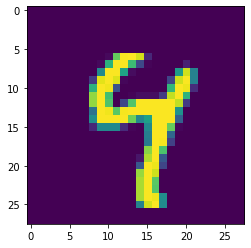

In [4]:
import matplotlib.pyplot as plt

train_data,train_label,test_data,test_label=load_new_data(True)
train_data=train_data.reshape(train_data.shape[0],28,28,1)
test_data=test_data.reshape(test_data.shape[0],28,28,1)

train_data_len=train_data.shape[0]
test_data_len=test_data.shape[0]

predict fail in 8 image


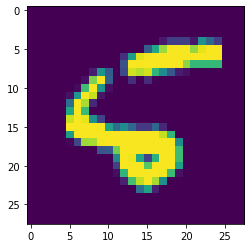

golden : 5
predict : 6
[3.9622742e-03 6.6308668e-05 1.6702436e-03 4.5213230e-07 2.9215882e-02
 1.3455457e-02 9.4979256e-01 6.4087573e-05 1.3091245e-03 4.6365289e-04]
average per execute time: 0.001986 ms


In [5]:
##predict
accumulate_time=0

for i in range(test_data_len):  # 依序於所有test data中
    #print ('train_data shape :',train_data[i].shape)
    input_data=test_data[i]
    input_data=input_data[np.newaxis, :]
    #print ('input_data shape :',input_data.shape)
    start = time.time()
    prediction=model.predict(input_data) 
    end = time.time()
    accumulate_time += (end - start)
    #print (prediction)
    result=translate_Y(prediction[0])
    golden=translate_Y(test_label[i])

    if result!=golden :
        
        print ('predict fail in',i,'image')
        plt.imshow(test_data[i])
        plt.show()
        print ('golden :',golden)
        print ('predict :',result)
        print (prediction[0])
        break
        
print ('average per execute time: %f ms' %(accumulate_time/test_data_len*1000))